# Project 4
## Introduce the problem and dataset
#### Wine

In [128]:
from sklearn.datasets import load_wine

In [129]:
# Load the wine dataset
wine_data = load_wine()

In [134]:
# Print the dataset
print(wine_data.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [136]:
# convert the dataset to a pandas dataframe
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

In [137]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [138]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

<Axes: xlabel='alcohol', ylabel='flavanoids'>

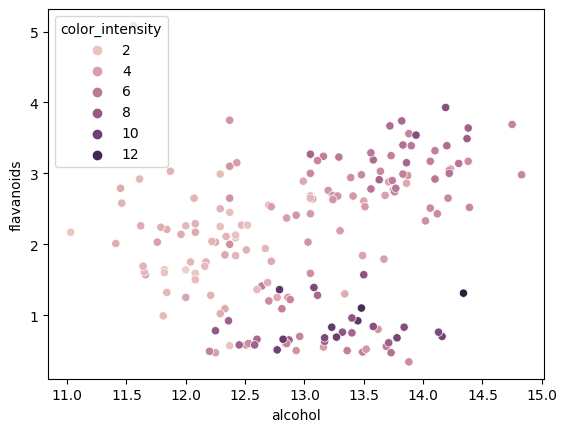

In [148]:
sns.scatterplot(x = 'alcohol', y = 'flavanoids', hue = 'color_intensity', data = wine_df)

<Axes: >

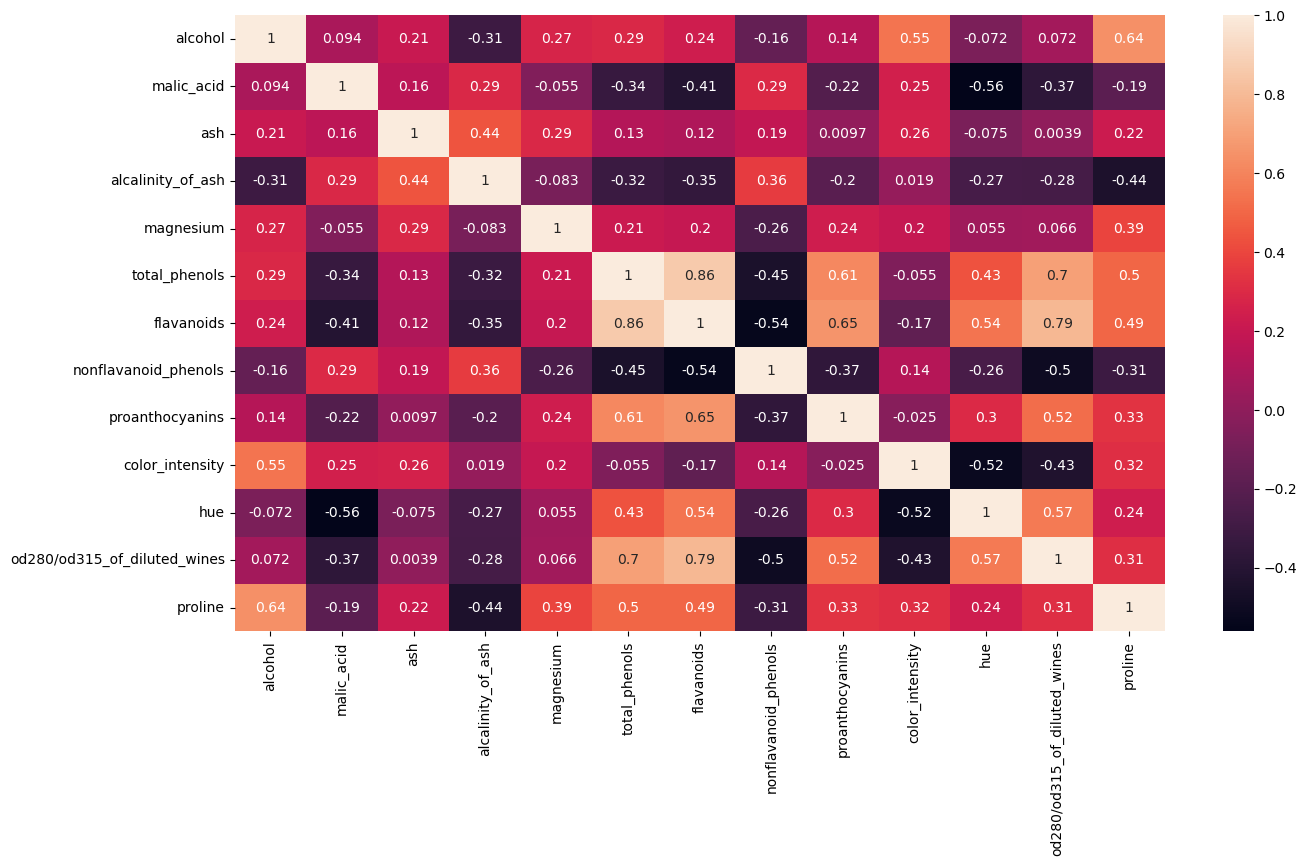

In [149]:
plt.figure(figsize=(15,8))
sns.heatmap(wine_df.corr(numeric_only= True),annot = True)

In [139]:
# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_df)

In [140]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [141]:
# KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [142]:
# Predict the cluster labels
cluster_labels = kmeans.labels_

In [143]:
# Add cluster labels to the PCA transformed data
pca_data_with_labels = np.column_stack((pca_data, cluster_labels))

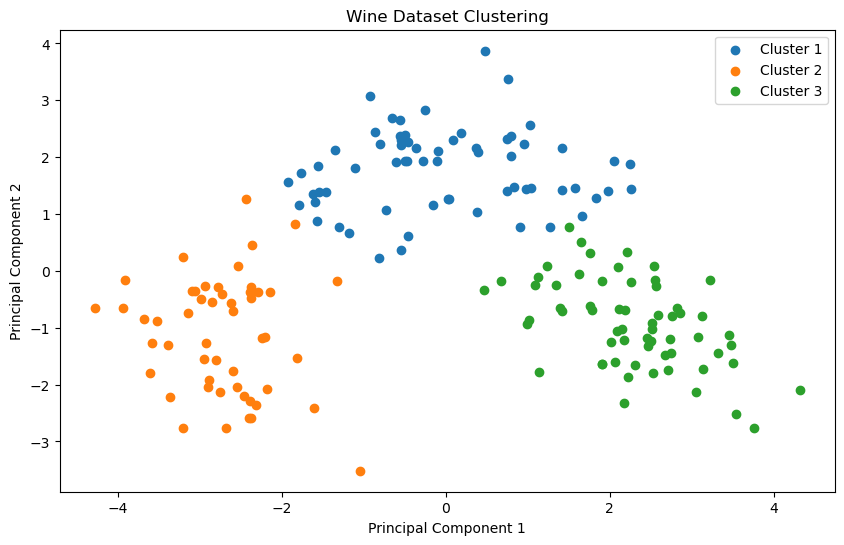

In [144]:
# Plot clusters
plt.figure(figsize=(10, 6))

for cluster in range(3):
    plt.scatter(pca_data_with_labels[pca_data_with_labels[:, 2] == cluster][:, 0], 
                pca_data_with_labels[pca_data_with_labels[:, 2] == cluster][:, 1], 
                label=f'Cluster {cluster + 1}')

plt.title('Wine Dataset Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

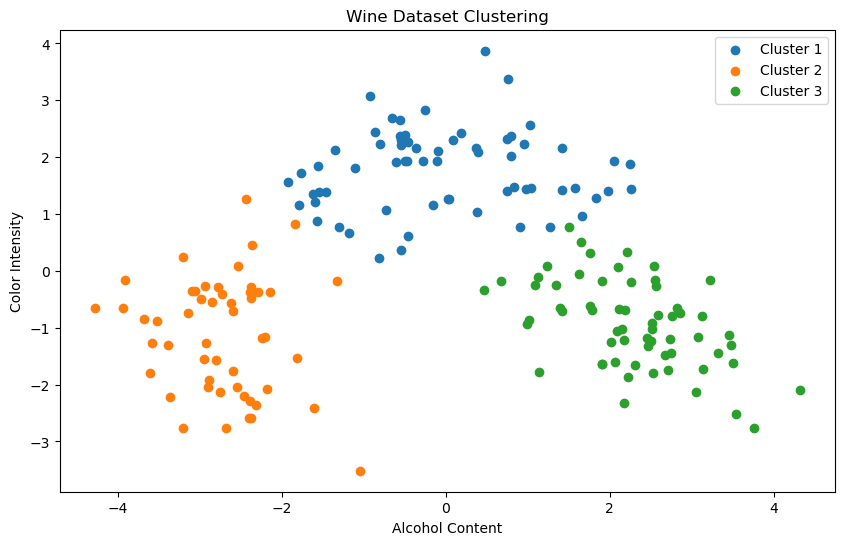

In [145]:
# Plot clusters
plt.figure(figsize=(10, 6))

for cluster in range(3):
    plt.scatter(pca_data_with_labels[pca_data_with_labels[:, 2] == cluster][:, 0], 
                pca_data_with_labels[pca_data_with_labels[:, 2] == cluster][:, 1], 
                label=f'Cluster {cluster + 1}')

plt.title('Wine Dataset Clustering')
plt.xlabel('Alcohol Content') 
plt.ylabel('Color Intensity')  
plt.legend()
plt.show()

# Project 4
## Introduce the problem and dataset
#### Fatal Police Shootings

In [150]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [151]:
fps_data = pd.read_csv(r"C:\Users\cesth\Data Science\ITCS 3162 - Data Mining\Projects\Project4\fatal-police-shootings-data.csv")

# Print the dataset
fps_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [152]:
fps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8002 non-null   int64  
 1   name                     7548 non-null   object 
 2   date                     8002 non-null   object 
 3   manner_of_death          8002 non-null   object 
 4   armed                    7791 non-null   object 
 5   age                      7499 non-null   float64
 6   gender                   7971 non-null   object 
 7   race                     6485 non-null   object 
 8   city                     8002 non-null   object 
 9   state                    8002 non-null   object 
 10  signs_of_mental_illness  8002 non-null   bool   
 11  threat_level             8002 non-null   object 
 12  flee                     7036 non-null   object 
 13  body_camera              8002 non-null   bool   
 14  longitude               

In [153]:
fps_data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [154]:
fps_data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [155]:
fps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8002 non-null   int64  
 1   name                     7548 non-null   object 
 2   date                     8002 non-null   object 
 3   manner_of_death          8002 non-null   object 
 4   armed                    7791 non-null   object 
 5   age                      7499 non-null   float64
 6   gender                   7971 non-null   object 
 7   race                     6485 non-null   object 
 8   city                     8002 non-null   object 
 9   state                    8002 non-null   object 
 10  signs_of_mental_illness  8002 non-null   bool   
 11  threat_level             8002 non-null   object 
 12  flee                     7036 non-null   object 
 13  body_camera              8002 non-null   bool   
 14  longitude               

<Axes: xlabel='race', ylabel='age'>

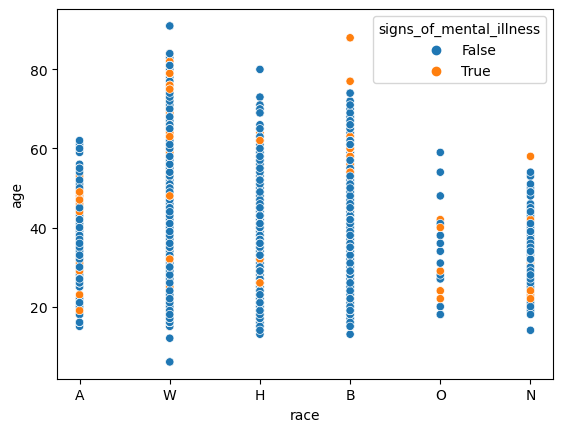

In [156]:
sns.scatterplot(x = 'race', y = 'age', hue = 'signs_of_mental_illness', data = fps_data)

<Axes: xlabel='longitude', ylabel='age'>

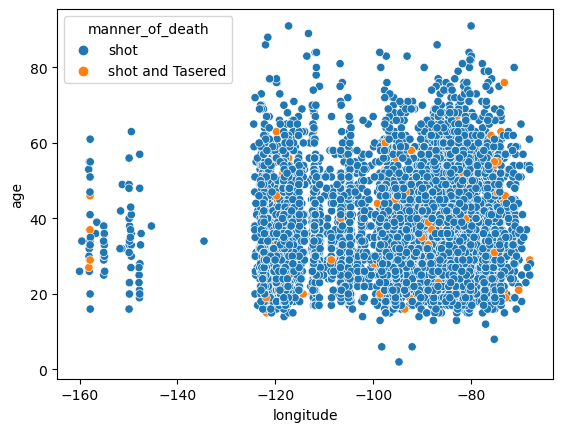

In [74]:
sns.scatterplot(x = 'longitude', y = 'age', hue = 'manner_of_death', data = fps_data)

<Axes: >

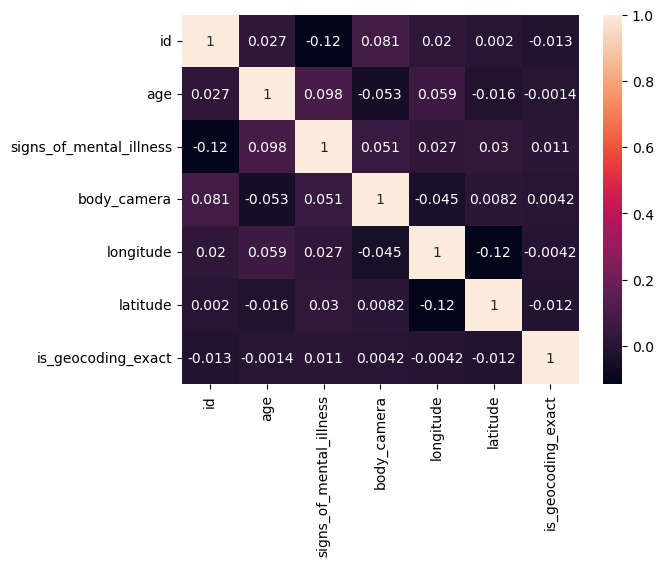

In [158]:
# correlation matrix
sns.heatmap(fps_data.corr(numeric_only= True),annot = True)

In [78]:
# Select relevant features
features = ['age', 'race', 'gender', 'body_camera', 'signs_of_mental_illness']
X = fps_data[features]

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7499 non-null   float64
 1   race                     6485 non-null   object 
 2   gender                   7971 non-null   object 
 3   body_camera              8002 non-null   bool   
 4   signs_of_mental_illness  8002 non-null   bool   
dtypes: bool(2), float64(1), object(2)
memory usage: 203.3+ KB


In [80]:
# Handling missing values
X.fillna(0, inplace=True)

C:\Users\cesth\AppData\Local\Temp\ipykernel_28092\2789117943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [92]:
# Convert all values in these column to strings
X['race'] = X['race'].astype(str)
X['gender'] = X['gender'].astype(str)

C:\Users\cesth\AppData\Local\Temp\ipykernel_28092\1543276360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['race'] = X['race'].astype(str)
C:\Users\cesth\AppData\Local\Temp\ipykernel_28092\1543276360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = X['gender'].astype(str)


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      8002 non-null   float64
 1   race                     8002 non-null   object 
 2   gender                   8002 non-null   object 
 3   body_camera              8002 non-null   bool   
 4   signs_of_mental_illness  8002 non-null   bool   
dtypes: bool(2), float64(1), object(2)
memory usage: 203.3+ KB


In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [93]:
# encode categorical variables and boolean variables
label_encoder = LabelEncoder()
X['race'] = label_encoder.fit_transform(X['race'])
X['gender'] = label_encoder.fit_transform(X['gender'])
X['body_camera'] = label_encoder.fit_transform(X['body_camera'])
X['signs_of_mental_illness'] = label_encoder.fit_transform(X['signs_of_mental_illness'])

C:\Users\cesth\AppData\Local\Temp\ipykernel_28092\1060118276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['race'] = label_encoder.fit_transform(X['race'])
C:\Users\cesth\AppData\Local\Temp\ipykernel_28092\1060118276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = label_encoder.fit_transform(X['gender'])
C:\Users\cesth\AppData\Local\Temp\ipykernel_28092\1060118276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [94]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
# Choosing the number of clusters using the silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

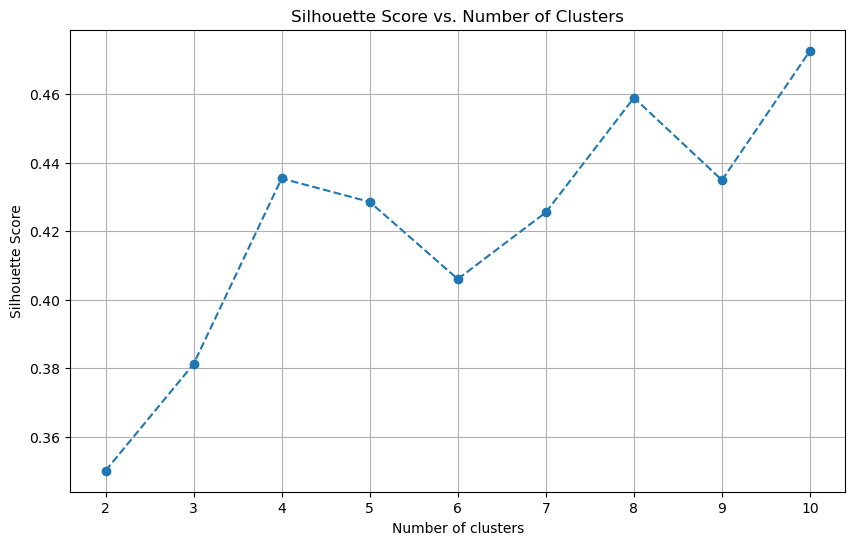

In [96]:
# Plotting silhouette scores to choose the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [101]:
# silhouette score: number of clusters?
n_clusters = 10

In [102]:
# K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


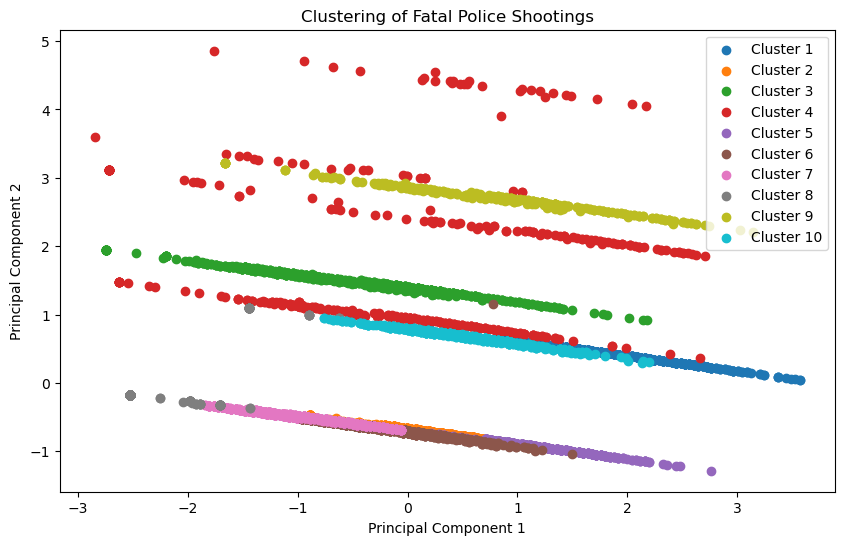

In [103]:
# Visualizing the clusters
# (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1], label=f'Cluster {cluster+1}')
plt.title('Clustering of Fatal Police Shootings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [104]:
# Evaluation
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4727398541143379


In [107]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [109]:
# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_cluster_labels = agg_clustering.fit_predict(X_scaled)

In [110]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_cluster_labels = dbscan.fit_predict(X_scaled)

In [111]:
# Calculate silhouette scores
agg_score = silhouette_score(X_scaled, agg_cluster_labels)
dbscan_score = silhouette_score(X_scaled, dbscan_cluster_labels)

In [112]:
silhouette_scores.append((n_clusters, agg_score, dbscan_score))

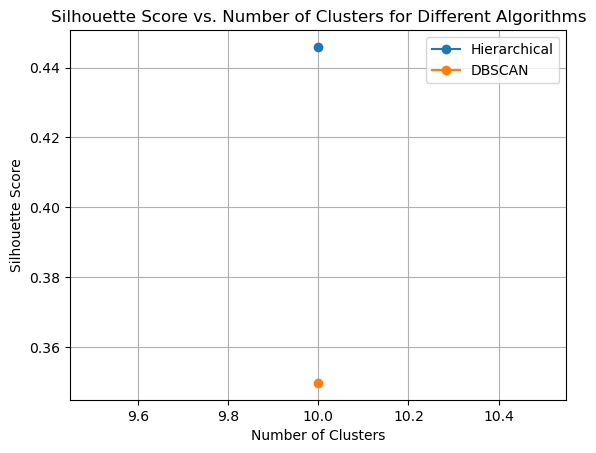

In [113]:
silhouette_df = pd.DataFrame(silhouette_scores, columns=['Number of Clusters', 'Hierarchical', 'DBSCAN'])

plt.plot(silhouette_df['Number of Clusters'], silhouette_df['Hierarchical'], label='Hierarchical', marker='o')
plt.plot(silhouette_df['Number of Clusters'], silhouette_df['DBSCAN'], label='DBSCAN', marker='o')

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
features = ['signs_of_mental_illness', 'threat_level', 'manner_of_death']
X = fps_data[features]

In [115]:
# Handling missing values
X.fillna(0, inplace=True)

C:\Users\cesth\AppData\Local\Temp\ipykernel_28092\2789117943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [116]:
label_encoder = LabelEncoder()
X['threat_level'] = label_encoder.fit_transform(X['threat_level'])
X['manner_of_death'] = label_encoder.fit_transform(X['manner_of_death'])

C:\Users\cesth\AppData\Local\Temp\ipykernel_28092\2025481564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['threat_level'] = label_encoder.fit_transform(X['threat_level'])
C:\Users\cesth\AppData\Local\Temp\ipykernel_28092\2025481564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['manner_of_death'] = label_encoder.fit_transform(X['manner_of_death'])


In [117]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [118]:
# Choosing the number of clusters using the silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

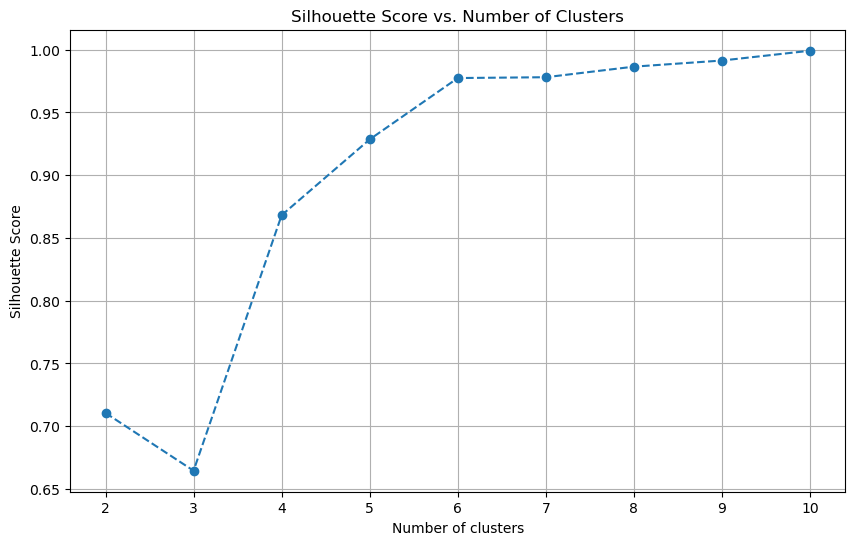

In [119]:
# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [123]:
n_clusters = 3

In [124]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

c:\Users\cesth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [125]:
# Visualiztion
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

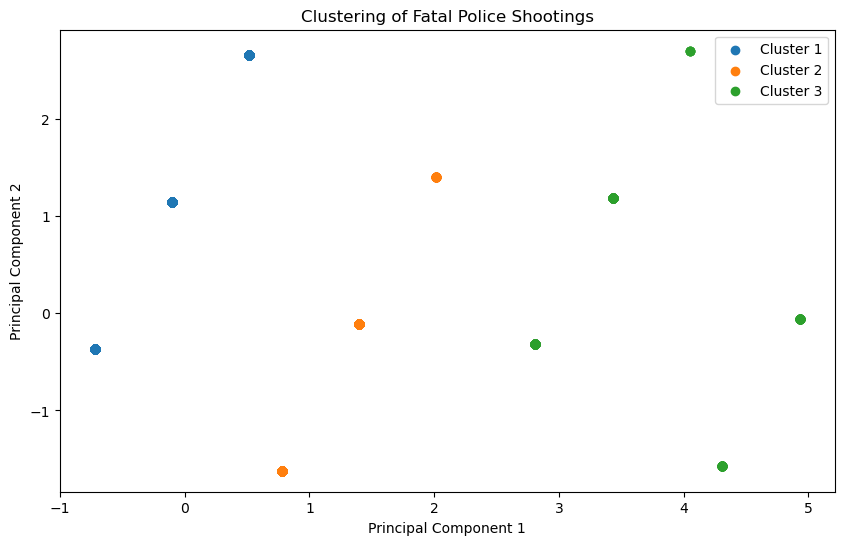

In [126]:
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1], label=f'Cluster {cluster+1}')
plt.title('Clustering of Fatal Police Shootings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()